## Librerias 

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Creación de perceptrón desde 0

In [23]:
X = np.array([  [0,0,1],
                [0,1,1],
                [1,0,1],
                [1,1,1] ])

Y = np.array([[0,0,1,1]]).T

In [27]:
def perceptron(X,Y,iteraciones):
    pesos_sinapticos = 2* np.random.random((3,1)) -1 
    
    sigmoide = (lambda x: 1/ (1+ np.e ** (-x)))
    sigmoide_derivada = (lambda x: x*(1-x))
    entrada = X
    salida_esperada = Y
    
    for i in range(iteraciones):
        salida = sigmoide(np.dot(entrada,pesos_sinapticos)) 
        
        error = salida_esperada - salida 
    
        ajustes = error * sigmoide_derivada(salida)
    
        pesos_sinapticos += np.dot(entrada.T, ajustes)
    return salida 

perceptron(X,Y, iteraciones = 20000)

array([[0.00679576],
       [0.00553578],
       [0.99548539],
       [0.99445654]])

> Voy a explicar paso por paso como se ha escrito el código del perceptrón:

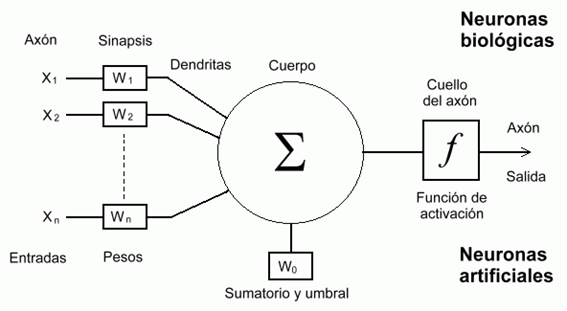

> Como se puede apreciar un perceptrón consta de varios elementos: 

- Por una parte tenemos las entradas y las salidas, las entradas serán las variables para entrenar el modelo y la salida la predicción arrojada por el modelo con dichas entradas

- Cada entrada será multiplicada por un peso y sumada al umbral de activación de la neurona (W0) 

- Una vez hechos los pasos anteriores, el producto resultante será corregido por una función de activación 
que permitirá ajustar la salida a un rango deseado (Como puede ser entre {-1,1} o {0-1}

Ahora bien, ¿Cómo se ajustan los pesos para que al multiplicarlos por las entradas den la salida deseada? Aquí la gracia del perceptrón, vamos por partes:

- Definición de los valores de entrada y la salida deseada:`

In [194]:
X = np.array([[0,0,1],
              [0,1,1],
              [1,0,1],
              [1,1,1]])

Y = np.array([[0,0,1,1]]).T

Vamos a pasar 3 variables de entrada a la neurona y una variable esperada de salida (Y). Si se observa detenidamente el objetivo es que el perceptrón aprenda a arrojar una salida de 1 solo cuando hay un valor de 1 en la primera variable. 

- Definición de los pesos 

Los pesos se van a generar aleatoriamente en cada iteración en un rango: 

``` pesos_sinapticos = 2* np.random.random((3,1)) -1 ```

El rango va desde 3 a 1 y es corregido siempre con un umbral de activación de -1

- Definición de función de activación:

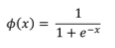

La función de activación sigmoide permite estandarizar la salida en un rango entre 0 y 1 como una probabilidad


```sigmoide = (lambda x: 1/ (1+ np.e ** (-x)))```

También se necesitará la derivada de la función (luego explicaré por qué)

```sigmoide_derivada = (lambda x: x*(1-x))```

- Calcular la salida a partir de la entrada:

```salida = sigmoide(np.dot(entrada,pesos_sinapticos))```

```np.dot``` Simplemente calcula  el producto de dos matrices, es decir, realiza este cálculo: 

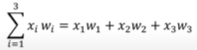

Se multiplica cada valor de entrada por cada peso 


- Definir el error:

El error simplemente será la diferencia entre el valor real y el valor devuelto por el perceptrón:

``` error = salida_esperada - salida  ```

- ***Definir el ajuste de pesos***:

Y aquí la guinda del pastel: 

``` ajustes = error * sigmoide_derivada(salida) ```

``` pesos_sinapticos += np.dot(entrada.T, ajustes) ```

¿Cómo corregir los pesos? En primera instancia los pesos se eligen aleatoreamente, pero no tiene sentido hacerlo así siempre (computacionalmente), se trata pues de un problema de optimización bastante simple (dado que es una única neurona). 

Tenemos una función tal que 

f(Wn) = En   

a la que si introducimos un determinado peso (Wn) obtenemos un error asociado a dicho peso (En). Aquí en primera instancia se puede pensar, bueno, si se tiene un error grande, se deverá de hacer un ajuste grande, es decir: 

ajuste = wn * En

Simplemente multiplicando el peso por el error, a mayor error, mayor corrección del peso. 


Bueno, esto podría bastar para dar saltos de un sitio a otro, pero nos podríamos estar alejando a la misma velocidad que nos acercamos en cada salto, ¿Cómo podríamos reducir el movimiento de salto a medida que nos acercamos al valor correcto?


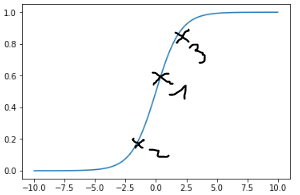
Observa la función sigmoidea, supongamos que esperamos un valor de 1: El primer resultado es de 0,6 que tiene un error asociado de 0,4, luego multiplicamos el peso por 0,4. Ahora supongamos que el valor se mueve a 0,2, ahora el error asociado es de 0,8 y se vuelve a mutliplicar el peso por 0,8. Ahora el valor pasa a ser 0,9...

Bien de esta forma se seleccionan pesos aleatorios y el incremento de peso (para bien o para mal) se desplaza en la misma proporción que el error, no obstante existe una forma muy sencilla de hacer que dicho peso sea corregido de forma más brusca cuando no tiende a converger.






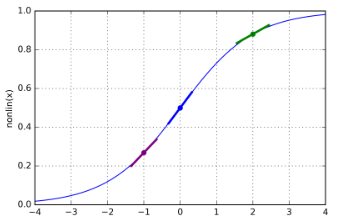
```sigmoide_derivada = (lambda x: x*(1-x))```

Por ejemplo, si se dibuja una función desde {0,1} mediante la función sigmoide, al aplicar la derivada de cada x resultante (para obtener la pendiente en cada punto) esta tiende a pronunciarse, es decir: Los valores cercanos a 1 y 0 serán pequeños mientras que la pendiente de valores cercanos a 0,5 (no polarizados) serán mas grandes:



```sigmoide_derivada(0.9) = 0.08 ```

```sigmoide_derivada (0,5) = 0.25 ```           #Los valores cercanos a 0,5 son siempre mas grandes que cercanos a 1 o 0

```sigmoide_derivada(0.1) = 0.09```

¿Y para que sirve esto? Bueno, si una función tiene un error pequeño y está cerca de un polo (0 o 1), entonces la derivada de la función multiplicará el error (pequeño) por la pendiente del punto (que también será pequeña), lo que permitirá que el ajuste de pesos sea mas pequeño a medida que se acerca al valor deseado. 

Por el contrario cuando el valor de x sea cercano a  0.5 y no esté nada polarizado hacia 1 o 0, la pendiente será muy grande, lo que permitirá que al multiplicarlo por el error (pese a no ser todo lo grande que pudiera ser, solo la mitad de hecho) el ajuste sea grande en cualquier caso. 
En resumen, al aplicar la derivada de la función sigmoidea permite que los pesos se polaricen de forma más rapida y se acerquen mejor al valor esperado.